In [1]:
from google.colab import files
uploaded = files.upload()


Saving callcenterdatacurrent.csv to callcenterdatacurrent.csv
Saving callcenterdatahistorical.csv to callcenterdatahistorical.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

historical = pd.read_csv('callcenterdatahistorical.csv')
current = pd.read_csv('callcenterdatacurrent.csv')

print("Historical Data:")
display(historical.head())

print("Current Data:")
display(current.head())



Historical Data:


,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2024-12-31 00:00:00,"6000 W KINNICKINNIC RIVER PK, MILWAUKEE, WI, 5...",Area Dark,2025-01-01 00:00:00,Lights along kk parkway between 60th and Cleve...
1,2024-12-31 00:00:00,"4701 W WASHINGTON BL, 1",Potholes,NaN,Potholes are bad to the east of N 47th St on W...
2,2024-12-31 00:00:00,"4719 W NASH ST, MILWAUKEE, WI, 53216-2918",Missed Collection: Garbage,2024-12-31 00:00:00,Checked online and checked printed schedule g...
3,2024-12-31 00:00:00,"3141 S QUINCY AV, MILWAUKEE, WI, 53207-2717",Missed Collection: Garbage,NaN,Our garbage and recycling bins haven’t been se...
4,2024-12-31 00:00:00,"2800 N 72ND ST, MILWAUKEE, WI, 53210-1105",Area Dark,2025-01-01 00:00:00,Lights have been out since Christmas


Current Data:


,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2025-06-29 00:00:00,"356 E DEWEY PL, MILWAUKEE, WI, 53207-2044",Street Light Out,NaN,Street light out near school
1,2025-06-29 00:00:00,3730 W KAUL AV,"Brush Pickup Request, Less than 2 Cubic Yards,...",2025-06-30 00:00:00,Pile of brush at rear of property and small pi...
2,2025-06-29 00:00:00,"1249 E RUSSELL AV, MILWAUKEE, WI, 53207-0000",Graffiti,NaN,Yellow graffiti on bridge
3,2025-06-29 00:00:00,"2578 S 64TH ST, MILWAUKEE, WI, 53219-2629","Brush Pickup Request, Less than 2 Cubic Yards,...",NaN,NaN
4,2025-06-29 00:00:00,"1249 E RUSSELL AV, MILWAUKEE, WI, 53207-0000",Graffiti,NaN,White spray paint on bridge


In [4]:
# Convert date columns to datetime
historical['CREATIONDATE'] = pd.to_datetime(historical['CREATIONDATE'], errors='coerce')
historical['CLOSEDDATETIME'] = pd.to_datetime(historical['CLOSEDDATETIME'], errors='coerce')

current['CREATIONDATE'] = pd.to_datetime(current['CREATIONDATE'], errors='coerce')
current['CLOSEDDATETIME'] = pd.to_datetime(current['CLOSEDDATETIME'], errors='coerce')

# Check nulls and shape
historical.info()
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165256 entries, 0 to 165255
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   CREATIONDATE                  165256 non-null  datetime64[ns]
 1   OBJECTDESC                    116100 non-null  object        
 2   TITLE                         165256 non-null  object        
 3   CLOSEDDATETIME                69920 non-null   datetime64[ns]
 4   CASECLOSUREREASONDESCRIPTION  113868 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4725 entries, 0 to 4724
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CREATIONDATE                  4725 non-null   datetime64[ns]
 1   OBJECTDESC                    4725 non-null   object 

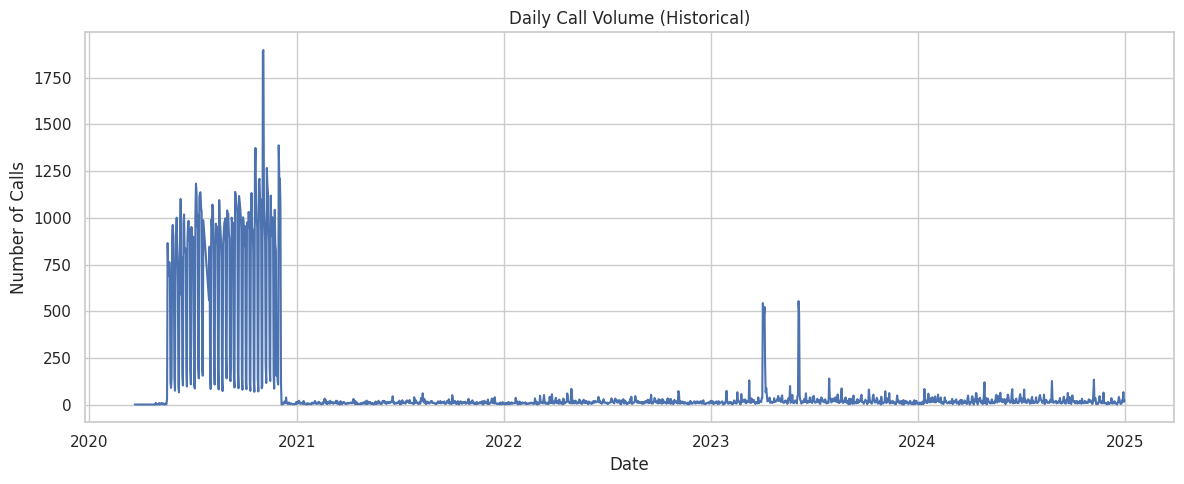

In [5]:
# Daily volume trend
daily_calls = historical.groupby(historical['CREATIONDATE'].dt.date).size()

plt.figure(figsize=(12, 5))
daily_calls.plot()
plt.title("Daily Call Volume (Historical)")
plt.xlabel("Date")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-2409812570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_titles.index, x=top_titles.values, palette="viridis")


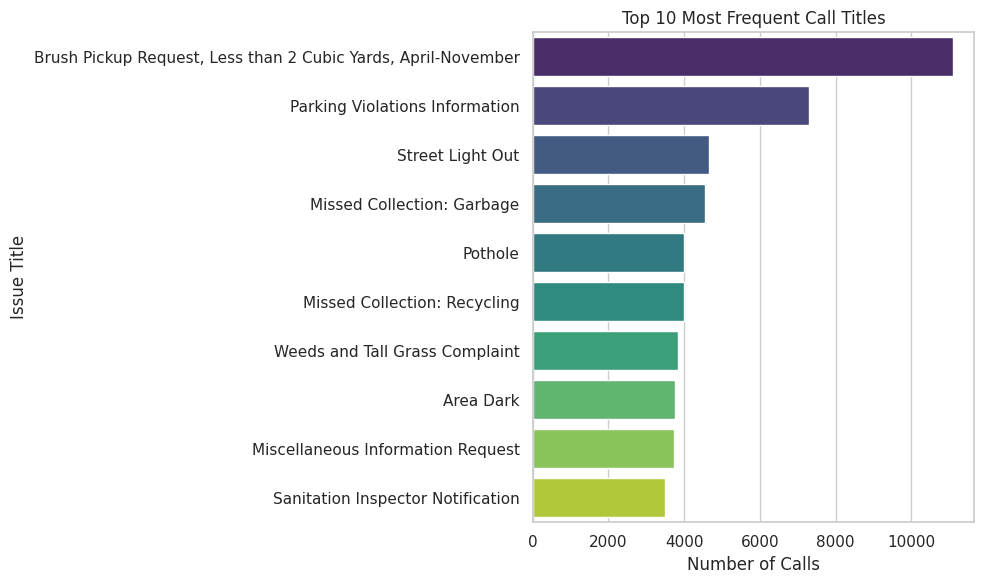

In [6]:
top_titles = historical['TITLE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_titles.index, x=top_titles.values, palette="viridis")
plt.title("Top 10 Most Frequent Call Titles")
plt.xlabel("Number of Calls")
plt.ylabel("Issue Title")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-2614996976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=closure_df, x='Count', y='Closure Reason', palette='Blues_d')


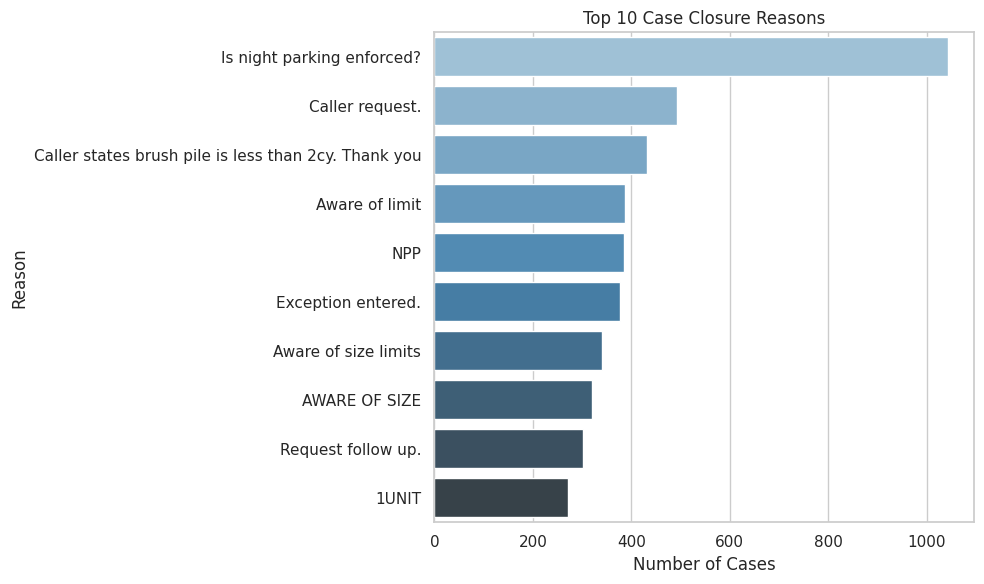

In [13]:
# Turn closure reason counts into a DataFrame for plotting
closure_df = closure_sample.reset_index()
closure_df.columns = ['Closure Reason', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=closure_df, x='Count', y='Closure Reason', palette='Blues_d')
plt.title("Top 10 Case Closure Reasons")
plt.xlabel("Number of Cases")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()



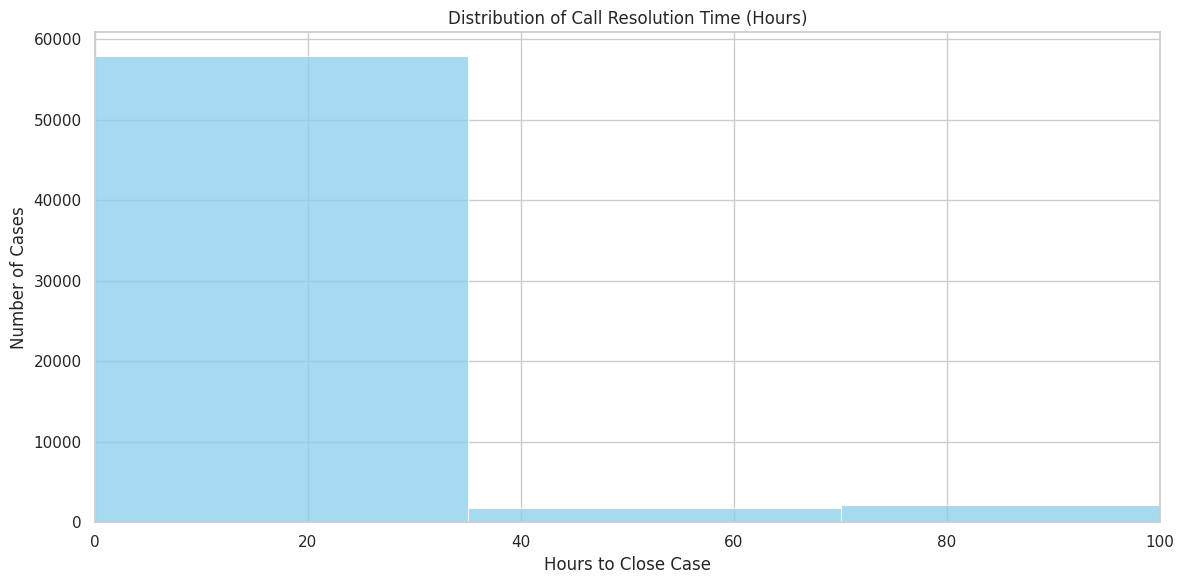

In [14]:
# Calculate how long each case took to close (in hours)
historical['DURATION_HOURS'] = (historical['CLOSEDDATETIME'] - historical['CREATIONDATE']).dt.total_seconds() / 3600

# Plot distribution of resolution times, zooming in on the most common range
plt.figure(figsize=(12, 6))
sns.histplot(historical['DURATION_HOURS'].dropna(), bins=100, color='skyblue')
plt.xlim(0, 100)
plt.title("Distribution of Call Resolution Time (Hours)")
plt.xlabel("Hours to Close Case")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()
